In [ ]:

!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Total 15298 (delta 0), reused 0 (delta 0), pack-reused 15298
Receiving objects: 100% (15298/15298), 13.67 MiB | 16.30 MiB/s, done.
Resolving deltas: 100% (10400/10400), done.


In [ ]:

%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:

!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:

!wget https://pjreddie.com/media/files/yolov3.weights

--2021-08-12 07:34:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.3MB/s    in 12s     

2021-08-12 07:34:28 (18.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

 
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:

!./darknet detect cfg/yolov3.cfg yolov3.weights data/coorg-festival.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

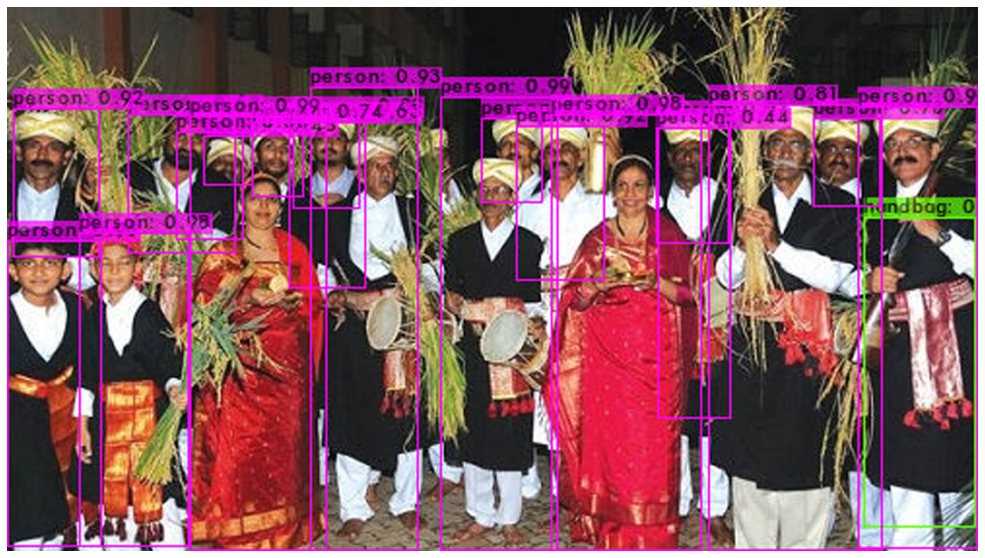

In [ ]:

imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

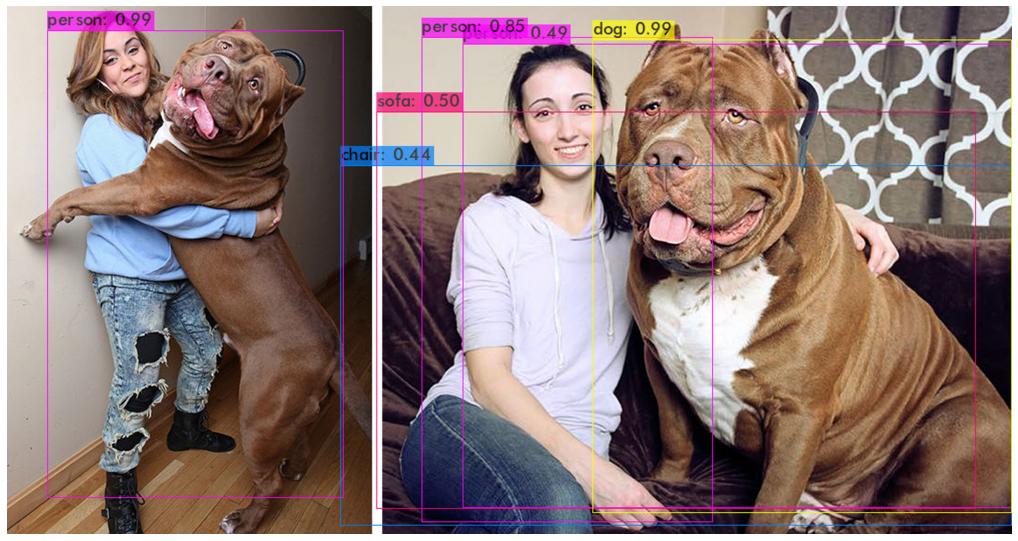

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/test_dog.jpg
imShow('predictions.jpg')

In [ ]:

%cd ..
upload()

/content


Saving Madikeri_Huthari-5.jpg to Madikeri_Huthari-5.jpg
saved file Madikeri_Huthari-5.jpg


/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Sh

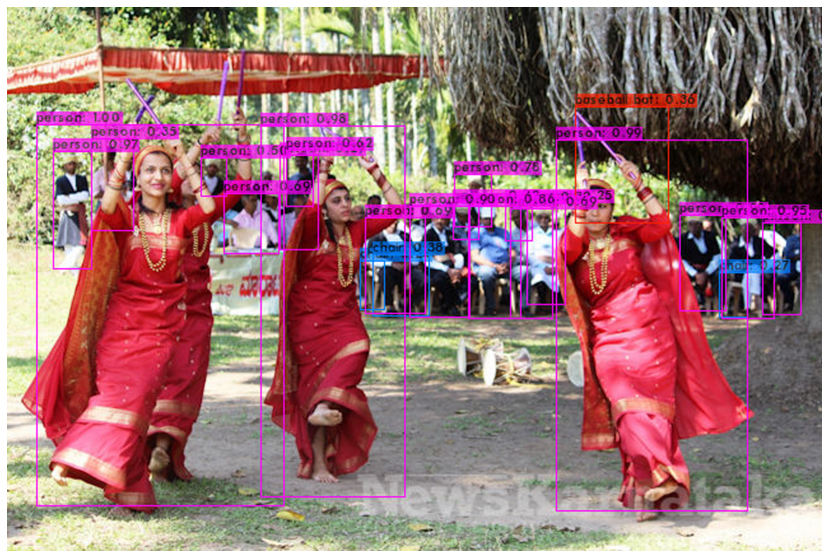

In [ ]:


%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../Madikeri_Huthari-5.jpg
imShow('predictions.jpg')

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'1NH18IS090 (1).pdf'
 1NH18IS090_201ISE641_CIE2.pdf
 1NH18IS090_20CIE53.pdf
'1NH18IS090_20CIE54 (1).pdf'
 1NH18IS090_20CIE54.pdf
 1NH18IS090_20ISE54_ASSIGNMENT-1.pdf
 1NH18IS090_20ISE54_ASSIGNMENT1.pdf
 1NH18IS090_20ISE54_ASSIGNMENT-2.pdf
 1NH18IS090_20ISE552_ASSIGNMENT1.pdf
'1NH18IS090 (2).pdf'
'1NH18IS090 (3).pdf'
 1NH18IS090_6B_USER_INTERFACE_DESIGN_CIE_2.pdf
 1NH18IS090_6B_USER_INTERFACE_DESIGN_CIE_3.pdf
 1NH18IS090_ADVANCEDJAVA_ASSIGNMENT1.pdf
 1NH18IS090_ADVANCED_JAVA_ASSIGNMENT_2.pdf
 1NH18IS090_ADVANCED_JAVA_CIE_1.pdf
 1NH18IS090_ADVANCE_JAVA_CIE_2.pdf
 1NH18IS090_ADVANCE_JAVA_CIE_3.pdf
 1NH18IS090_ASSIGNMENT-2_20ISE552.pdf
 1NH18IS090_ASSIGNMENT2.pdf
 1NH18IS090_BIGDATA_6B_CIE_3-merged.pdf
 1NH18IS090_BIG_DATA.pdf
 1NH18IS090_BIGDATA_SQL_VIDEO.mp4
 1NH18IS090_CASE_STUDY_DV.pdf
 1NH18IS090_CIE2_20ISE51.pdf
 1NH18IS090_CIE2_20ise52.pdf
 1NH18IS090_CIE-2_20ISE54.pdf
 1NH18IS090_CIE-2_20ISE552.pdf
 1NH18IS090_DAA_CHANGEDOUTPUT.png
 1NH18IS090_DAA_CHANGEDPGMcode-converted.pdf
 1NH1

[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  6

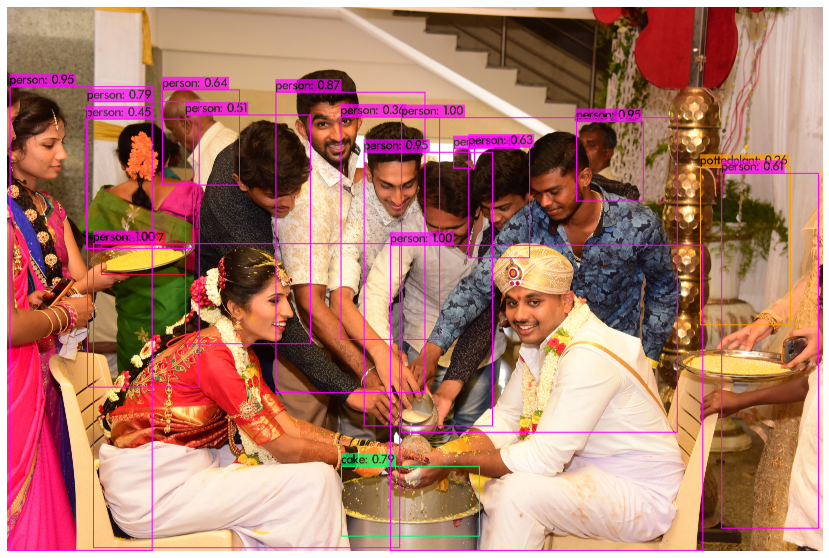

In [ ]:
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/DSC_3017.JPG
imShow('predictions.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!nvidia-smi

Thu Aug 12 07:40:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Total 15298 (delta 0), reused 0 (delta 0), pack-reused 15298
Receiving objects: 100% (15298/15298), 13.65 MiB | 19.44 MiB/s, done.
Resolving deltas: 100% (10397/10397), done.


In [ ]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 40 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [ ]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/darknet/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1444:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1420:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     i

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2021-08-12 07:46:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.7MB/s    in 12s     

2021-08-12 07:46:48 (19.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!pwd

/content/darknet/darknet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libvorbis-dev is already the newest version (1.3.5-4.2).
libvorbis-dev set to manually installed.
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
libdc1394-22 is already the newest version (2.2.5-1).
libdc1394-22 set to manually installed.
libdc1394-22-dev is already the newest version (2.2.5-1).
libdc1394-22-dev set to manually installed.
libtbb-dev is already the newest version (2017~U7-8).
libtbb-dev set to manually installed.
libtiff5-dev is already the newest version (4.0.9-5ubuntu0.4).
libtiff5-dev set to manually installed.
qtbase5-dev is already the newest version (5.9.5+dfsg-0ubuntu2.5).
qtbase5-dev set to manually installed.
unzip is already the newest version (6.0-21ubuntu1.1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test3.mp4 to test3.mp4


In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show test3.mp4 -i 0 -out_filename output01.avi -thresh 0.7

 CUDA-version: 11000 (11020), GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 10

In [ ]:
from google.colab import files
files.download('output01.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>